In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Directory paths for the datasets

censo_dir = 'data/censo-escolar/dados/microdados_ed_basica_2023.csv'
ts_aluno_2ef_dir = 'data/saeb/DADOS/TS_ALUNO_2EF.csv'
ts_aluno_5ef_dir = 'data/saeb/DADOS/TS_ALUNO_5EF.csv'
ts_aluno_9ef_dir = 'data/saeb/DADOS/TS_ALUNO_9EF.csv'
ts_aluno_34em_dir = 'data/saeb/DADOS/TS_ALUNO_34EM.csv'
ts_escola_dir = 'data/saeb/DADOS/TS_ESCOLA.csv'

In [3]:
# Upload the datasets

df_censo = pd.read_csv(censo_dir, sep=';', encoding='latin1')
df_ts_aluno_2ef = pd.read_csv(ts_aluno_2ef_dir, sep=';', encoding='latin1')
df_ts_aluno_5ef = pd.read_csv(ts_aluno_5ef_dir, sep=';', encoding='latin1')
df_ts_aluno_9ef = pd.read_csv(ts_aluno_9ef_dir, sep=';', encoding='latin1')
df_ts_aluno_34em = pd.read_csv(ts_aluno_34em_dir, sep=';', encoding='latin1')
df_ts_escola = pd.read_csv(ts_escola_dir, sep=';', encoding='latin1')

/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_22764/3119260048.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_censo = pd.read_csv(censo_dir, sep=';', encoding='latin1')
/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_22764/3119260048.py:5: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ts_aluno_5ef = pd.read_csv(ts_aluno_5ef_dir, sep=';', encoding='latin1')
/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_22764/3119260048.py:6: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ts_aluno_9ef = pd.read_csv(ts_aluno_9ef_dir, sep=';', encoding='latin1')


In [4]:
# Verificar quais são os estados da região Sul (censo)
uf = df_censo['SG_UF'].unique()
cod = df_censo['CO_UF'].unique()

merge = pd.DataFrame({'UF': uf, 'COD': cod})
print(merge.to_string(index=False))

UF  COD
RO   11
AC   12
AM   13
RR   14
PA   15
AP   16
TO   17
MA   21
PI   22
CE   23
RN   24
PB   25
PE   26
AL   27
SE   28
BA   29
MG   31
ES   32
RJ   33
SP   35
PR   41
SC   42
RS   43
MS   50
MT   51
GO   52
DF   53


In [5]:
# Criar um dataframe da Região Sul
df_censo_sul = df_censo[df_censo['SG_UF'].isin(['PR', 'RS', 'SC'])]
df_censo_sul

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
177504,2023,Sul,4,Paraná,PR,41,Alto Paraná,4100608,Maringá,4104,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177505,2023,Sul,4,Paraná,PR,41,Alto Paraná,4100608,Maringá,4104,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177506,2023,Sul,4,Paraná,PR,41,Alto Paraná,4100608,Maringá,4104,...,10.0,0.0,0.0,10.0,7.0,3.0,0.0,0.0,0.0,0.0
177507,2023,Sul,4,Paraná,PR,41,Alto Paraná,4100608,Maringá,4104,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177508,2023,Sul,4,Paraná,PR,41,Alto Paraná,4100608,Maringá,4104,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206161,2023,Sul,4,Rio Grande do Sul,RS,43,Camaquã,4303509,Porto Alegre,4301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206162,2023,Sul,4,Rio Grande do Sul,RS,43,Parobé,4314050,Porto Alegre,4301,...,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206163,2023,Sul,4,Rio Grande do Sul,RS,43,Santa Cruz do Sul,4316808,Santa Cruz do Sul - Lajeado,4308,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206164,2023,Sul,4,Rio Grande do Sul,RS,43,Venâncio Aires,4322608,Santa Cruz do Sul - Lajeado,4308,...,12.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Região Sul no saeb é ID_REGIAO==4
# Criar um dataframe da Região Sul
df_ts_aluno_2ef_sul = df_ts_aluno_2ef[df_ts_aluno_2ef['ID_REGIAO'] == 4]
df_ts_aluno_5ef_sul = df_ts_aluno_5ef[df_ts_aluno_5ef['ID_REGIAO'] == 4]
df_ts_aluno_9ef_sul = df_ts_aluno_9ef[df_ts_aluno_9ef['ID_REGIAO'] == 4]
df_ts_aluno_34em_sul = df_ts_aluno_34em[df_ts_aluno_34em['ID_REGIAO'] == 4]

In [7]:
# Limpar as colunas que não são necessárias (saeb)
colunas_relevantes_saeb = [
    'ID_REGIAO',
    'ID_UF',
    'ID_AREA',
    'IN_PUBLICA',
    'ID_LOCALIZACAO',
    'IN_PREENCHIMENTO_LP',
    'IN_PREENCHIMENTO_MT',
    'PROFICIENCIA_MT',
    'PROFICIENCIA_LP'
]

df_ts_aluno_2ef_sul = df_ts_aluno_2ef_sul[colunas_relevantes_saeb]
df_ts_aluno_5ef_sul = df_ts_aluno_5ef_sul[colunas_relevantes_saeb]
df_ts_aluno_9ef_sul = df_ts_aluno_9ef_sul[colunas_relevantes_saeb]
df_ts_aluno_34em_sul = df_ts_aluno_34em_sul[colunas_relevantes_saeb]

In [8]:
# Limpar as colunas que não são necessárias (censo_escolar)
colunas_relevantes_censo = [
    'NO_REGIAO',
    'CO_UF',
    'TP_CATEGORIA_ESCOLA_PRIVADA',
    'TP_DEPENDENCIA',
    'TP_LOCALIZACAO',
    'IN_AGUA_POTAVEL',
    'IN_ENERGIA_INEXISTENTE',
    'IN_BIBLIOTECA',
    'IN_LABORATORIO_CIENCIAS',
    'IN_LABORATORIO_INFORMATICA',
    'IN_COMPUTADOR',
    'IN_EQUIP_IMPRESSORA',
    'IN_EQUIP_TV',
    'QT_EQUIP_TV',
    'IN_EQUIP_LOUSA_DIGITAL',
    'QT_EQUIP_LOUSA_DIGITAL',
    'IN_EQUIP_MULTIMIDIA',
    'QT_EQUIP_MULTIMIDIA',
    'IN_DESKTOP_ALUNO',
    'QT_DESKTOP_ALUNO',
    'IN_COMP_PORTATIL_ALUNO',
    'QT_COMP_PORTATIL_ALUNO',
    'IN_INTERNET',
    'IN_INTERNET_ALUNOS',
    'IN_MATERIAL_PED_MULTIMIDIA'
]

df_censo_sul = df_censo_sul[colunas_relevantes_censo]
df_censo_sul

,NO_REGIAO,CO_UF,TP_CATEGORIA_ESCOLA_PRIVADA,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_BIBLIOTECA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,...,QT_EQUIP_LOUSA_DIGITAL,IN_EQUIP_MULTIMIDIA,QT_EQUIP_MULTIMIDIA,IN_DESKTOP_ALUNO,QT_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_ALUNO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_MATERIAL_PED_MULTIMIDIA
177504,Sul,41,NaN,2,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,5.0,1.0,33.0,1.0,31.0,1.0,1.0,1.0
177505,Sul,41,NaN,3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
177506,Sul,41,NaN,3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
177507,Sul,41,NaN,3,1,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
177508,Sul,41,NaN,3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206161,Sul,43,NaN,3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0
206162,Sul,43,NaN,2,1,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,6.0,1.0,15.0,1.0,25.0,1.0,1.0,0.0
206163,Sul,43,1.0,4,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
206164,Sul,43,NaN,1,1,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,15.0,1.0,45.0,1.0,20.0,1.0,1.0,1.0


In [9]:
pd.crosstab(df_ts_aluno_2ef_sul['IN_PUBLICA'], df_ts_aluno_2ef_sul['ID_LOCALIZACAO'], normalize='index')

ID_LOCALIZACAO,1,2
IN_PUBLICA,,
0,0.864943,0.135057
1,0.749073,0.250927


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)

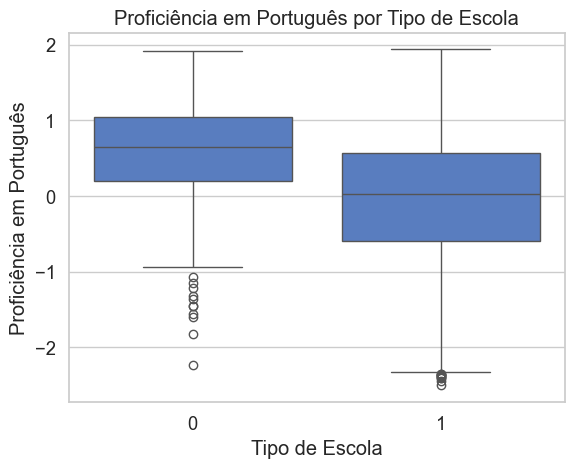

In [12]:
sns.boxplot(x='IN_PUBLICA', y='PROFICIENCIA_LP', data=df_ts_aluno_2ef_sul, )
plt.title('Proficiência em Português por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Proficiência em Português')
plt.show()

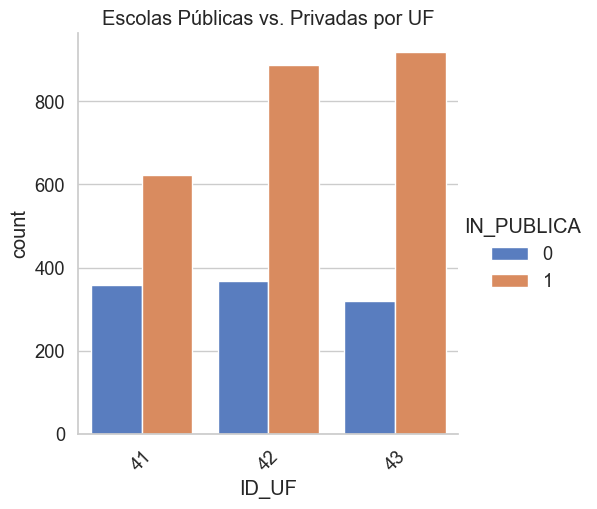

In [13]:
sns.catplot(x='ID_UF', hue='IN_PUBLICA', kind='count', data=df_ts_aluno_2ef_sul)
plt.xticks(rotation=45)
plt.title('Escolas Públicas vs. Privadas por UF')
plt.show()

In [14]:
import pandas as pd

# Assuming df_censo_sul is your DataFrame
for index, row in df_censo_sul.iterrows():
    if row["QT_EQUIP_TV"] == 88888.0:
        print(row)  # Print the row for inspection
        df_censo_sul.at[index, "QT_EQUIP_TV"] = None  # Set the value to None in the DataFrame

NO_REGIAO                          Sul
CO_UF                               41
TP_CATEGORIA_ESCOLA_PRIVADA        NaN
TP_DEPENDENCIA                       3
TP_LOCALIZACAO                       1
IN_AGUA_POTAVEL                    1.0
IN_ENERGIA_INEXISTENTE             0.0
IN_BIBLIOTECA                      1.0
IN_LABORATORIO_CIENCIAS            0.0
IN_LABORATORIO_INFORMATICA         1.0
IN_COMPUTADOR                      1.0
IN_EQUIP_IMPRESSORA                1.0
IN_EQUIP_TV                        1.0
QT_EQUIP_TV                    88888.0
IN_EQUIP_LOUSA_DIGITAL             0.0
QT_EQUIP_LOUSA_DIGITAL             0.0
IN_EQUIP_MULTIMIDIA                1.0
QT_EQUIP_MULTIMIDIA                1.0
IN_DESKTOP_ALUNO                   1.0
QT_DESKTOP_ALUNO                  14.0
IN_COMP_PORTATIL_ALUNO             0.0
QT_COMP_PORTATIL_ALUNO             0.0
IN_INTERNET                        1.0
IN_INTERNET_ALUNOS                 0.0
IN_MATERIAL_PED_MULTIMIDIA         1.0
Name: 177515, dtype: obje

In [15]:

numeric_columns = df_censo_sul.select_dtypes(include=['float64', 'int64']).columns

# Substituir 88888.0 por None (NaN) em todas as colunas numéricas
for col in numeric_columns:
    df_censo_sul.loc[df_censo_sul[col] == 88888.0, col] = None

# Opcional: Verificar quais linhas tinham 88888.0 (antes ou após a substituição)
# Antes (se quiser verificar primeiro, execute isso antes da substituição)
print("Linhas com 88888.0 antes da substituição:")
for col in numeric_columns:
    if (df_censo_sul[col] == 88888.0).any():
        print(f"\nColuna: {col}")
        print(df_censo_sul[df_censo_sul[col] == 88888.0][[col]])

# Após: Verificar linhas com NaN nas colunas modificadas
print("\nLinhas com NaN após substituição:")
for col in numeric_columns:
    if df_censo_sul[col].isna().any():
        print(f"\nColuna: {col}")
        print(df_censo_sul[df_censo_sul[col].isna()][[col]])

Linhas com 88888.0 antes da substituição:

Linhas com NaN após substituição:

Coluna: TP_CATEGORIA_ESCOLA_PRIVADA
        TP_CATEGORIA_ESCOLA_PRIVADA
177504                          NaN
177505                          NaN
177506                          NaN
177507                          NaN
177508                          NaN
...                             ...
206159                          NaN
206161                          NaN
206162                          NaN
206164                          NaN
206165                          NaN

[22346 rows x 1 columns]

Coluna: IN_AGUA_POTAVEL
        IN_AGUA_POTAVEL
177520              NaN
177696              NaN
177738              NaN
178038              NaN
178041              NaN
...                 ...
206117              NaN
206121              NaN
206132              NaN
206138              NaN
206157              NaN

[2517 rows x 1 columns]

Coluna: IN_ENERGIA_INEXISTENTE
        IN_ENERGIA_INEXISTENTE
177520                     

/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_30826/1577865523.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  saeb_df['PROFICIENCIA_MT'].fillna(0.26, inplace=True)  # Mediana do documento
/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_30826/1577865523.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

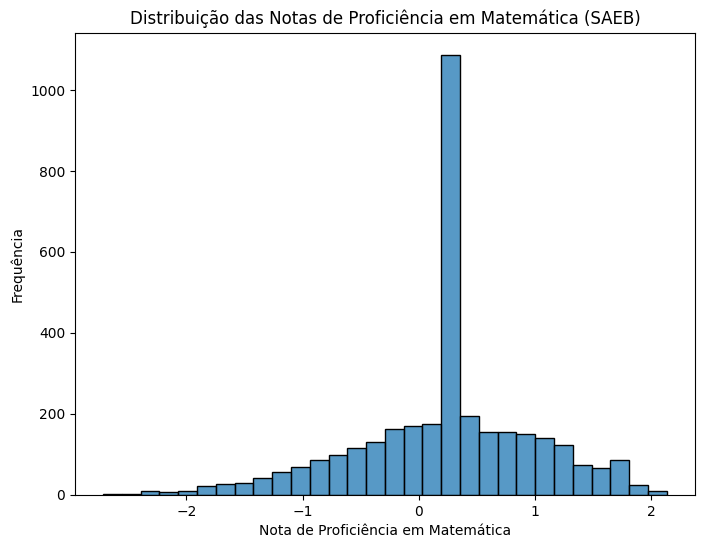

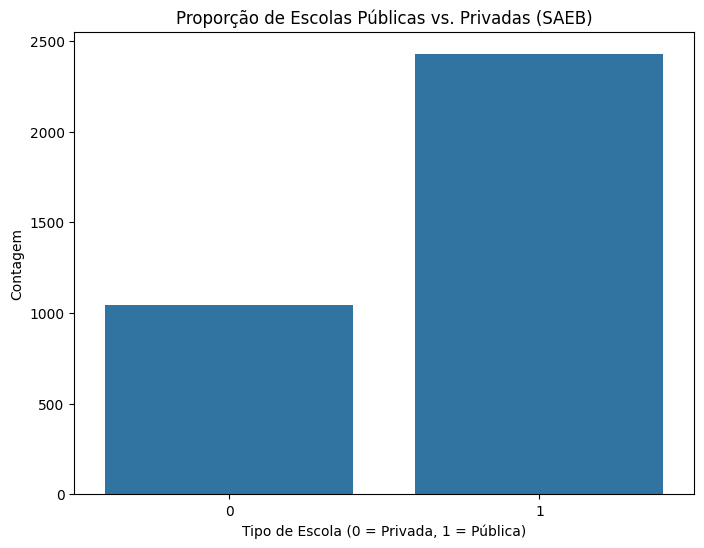

ValueError: Invalid RGBA argument: 'palette'

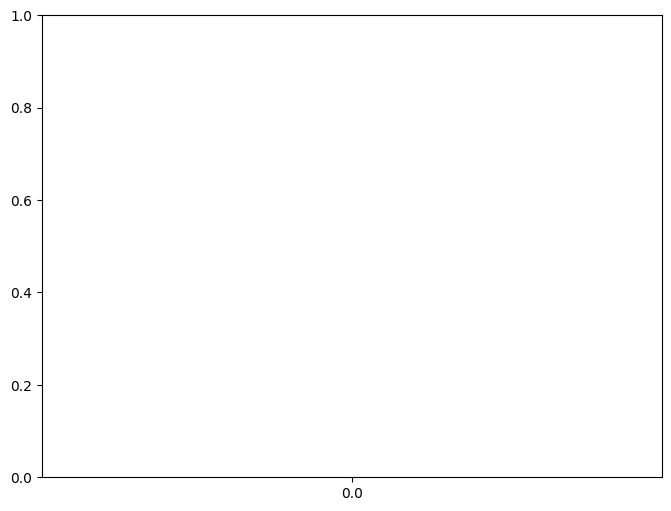

In [ ]:
# Carregar os datasets
saeb_df = pd.read_csv('data/saeb_2ef_sul.csv', sep=";")
censo_df = pd.read_csv('data/censo_sul.csv', sep=";")

# Pré-processamento: imputar valores ausentes com a mediana para variáveis numéricas
saeb_df['PROFICIENCIA_MT'].fillna(0.26, inplace=True)  # Mediana do documento
censo_df['QT_DESKTOP_ALUNO'].fillna(2, inplace=True)   # Mediana do documento

# Garantir que QT_DESKTOP_ALUNO não tenha valores negativos
censo_df['QT_DESKTOP_ALUNO'] = censo_df['QT_DESKTOP_ALUNO'].clip(lower=0)

# --- Visualizações para o Dataset SAEB ---

# 1. Histograma para PROFICIENCIA_MT
plt.figure(figsize=(8, 6))
sns.histplot(data=saeb_df, x='PROFICIENCIA_MT', bins=30)
plt.title('Distribuição das Notas de Proficiência em Matemática (SAEB)')
plt.xlabel('Nota de Proficiência em Matemática')
plt.ylabel('Frequência')
plt.show()

# 2. Gráfico de barras para IN_PUBLICA
plt.figure(figsize=(8, 6))
sns.countplot(data=saeb_df, x='IN_PUBLICA')
plt.title('Proporção de Escolas Públicas vs. Privadas (SAEB)')
plt.xlabel('Tipo de Escola (0 = Privada, 1 = Pública)')
plt.ylabel('Contagem')
plt.show()

# --- Visualizações para o Dataset Censo Escolar ---

# 3. Gráfico de barras para IN_INTERNET
plt.figure(figsize=(8, 6))
sns.countplot(data=censo_df, x='IN_INTERNET')
plt.title('Proporção de Escolas com Acesso à Internet (Censo Escolar)')
plt.xlabel('Acesso à Internet (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# 4. Boxplot para QT_DESKTOP_ALUNO com limite no eixo y
plt.figure(figsize=(8, 6))
y_limit = censo_df['QT_DESKTOP_ALUNO'].quantile(0.95)  # 95º percentil
sns.boxplot(data=censo_df, y='QT_DESKTOP_ALUNO', x='TP_DEPENDENCIA').set(ylim=(0, y_limit))
plt.title('Distribuição de Desktops usados por Alunos (Censo Escolar)')
plt.ylabel('Número de Desktops')
plt.show()

In [ ]:
censo_df.drop(axis=1, columns='NO_REGIAO', inplace=True)

In [ ]:
saebcorr = saeb_df.corr()
censocorr = censo_df.corr()

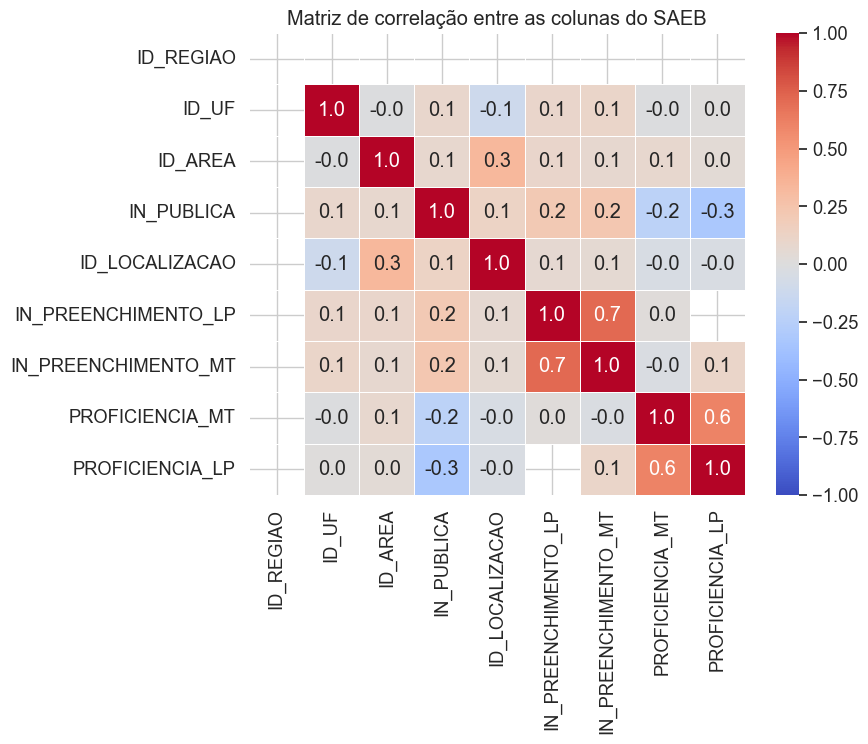

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(saebcorr, annot=True, fmt=".1f", linewidths=.6, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Matriz de correlação entre as colunas do SAEB')
plt.show()

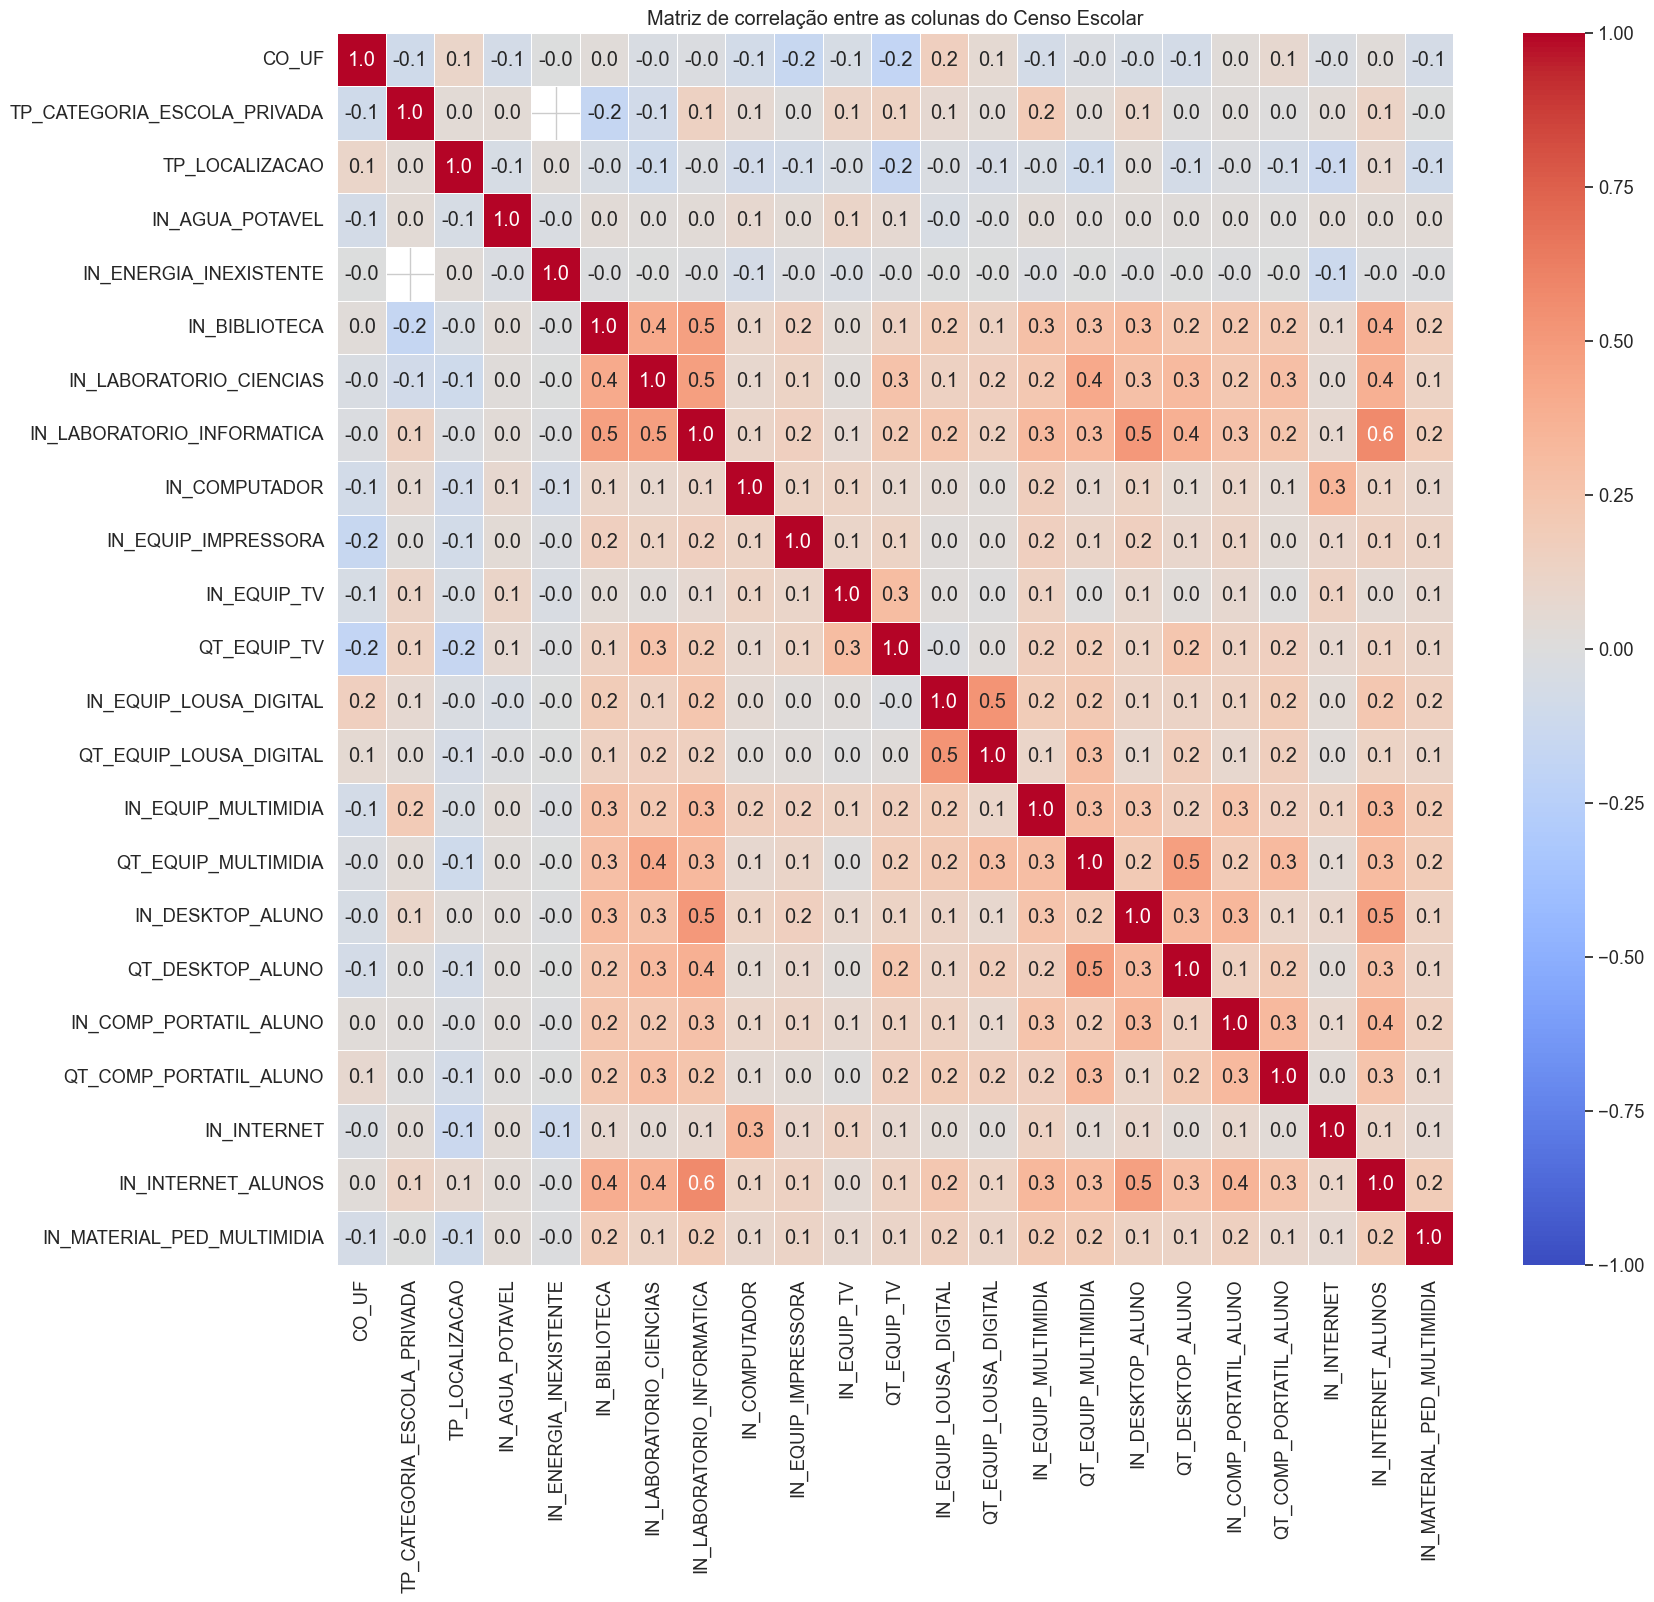

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(censocorr, annot=True, fmt=".1f", linewidths=.6, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Matriz de correlação entre as colunas do Censo Escolar')
plt.show()

<Axes: xlabel='PROFICIENCIA_MT', ylabel='Count'>

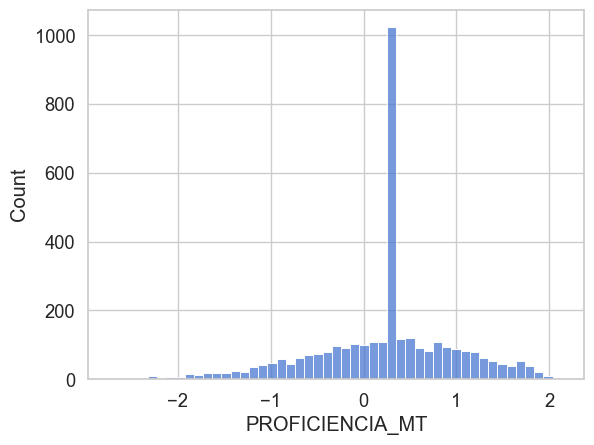

In [ ]:
sns.histplot(saeb_df, x="PROFICIENCIA_MT")

In [18]:
censo_df["TP_DEPENDENCIA"]

KeyError: 'TP_DEPENDENCIA'

In [ ]:
# Gerar .csv com os dados atualizados:
main_datasets_dir = 'data/'

df_censo_sul.to_csv(main_datasets_dir + 'censo_sul.csv', sep=';', index=False, encoding='latin1')
# df_ts_aluno_2ef_sul.to_csv(main_datasets_dir + 'saeb_2ef_sul.csv', sep=';', index=False, encoding='latin1')
# df_ts_aluno_5ef_sul.to_csv(main_datasets_dir + 'saeb_5ef_sul.csv', sep=';', index=False, encoding='latin1')
# df_ts_aluno_9ef_sul.to_csv(main_datasets_dir + 'saeb_9ef_sul.csv', sep=';', index=False, encoding='latin1')
# df_ts_aluno_34em_sul.to_csv(main_datasets_dir + 'saeb_34em_sul.csv', sep=';', index=False, encoding='latin1')